In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
from torchvision.models import vgg19, VGG19_Weights

import copy

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

In [6]:
imsize = 512 if torch.cuda.is_available() else 128

loader = transforms.Compose([
    transforms.Resize(imsize),
    transforms.ToTensor()
])

def image_loader(image_name):
    image = Image.open(image_name)
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

style_img = image_loader(r"E:\Deep Learning Project\Style_Transfer\data\picasso.jpg")
content_img = image_loader(r"E:\Deep Learning Project\Style_Transfer\data\dancing.jpg")

assert style_img.size() == content_img.size()

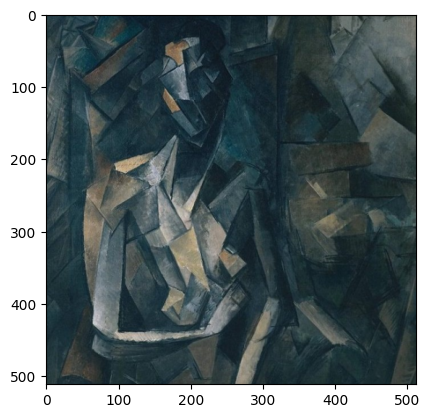

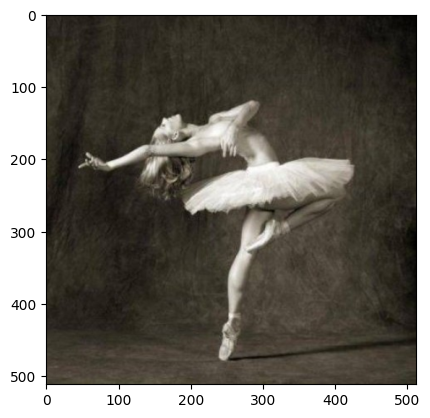

In [9]:
unloader = transforms.ToPILImage()

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    plt.imshow(image)
    if title is None:
        plt.title(title)
    
    plt.pause(0.001)
    
plt.figure()
imshow(style_img, title="Style Image")

plt.figure()
imshow(content_img, title="Content Image")

In Neural Style Transfer (NST), Content Loss measures how different the content of the generated image is from the content of the original content image. The goal of the content loss is to ensure that the generated image retains the structure and semantic content of the content image.

In [ ]:
class ContentLoss(nn.Module):
    def __init__(self, target):
        super(ContentLoss, self).__init__()
        self.target = target.detach()
        
    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

In Neural Style Transfer (NST), Style Loss measures how different the style of the generated image is from the style image. The goal of the style loss is to ensure that the generated image captures the textures, patterns, and overall "feel" of the style image.